In [1]:
import ROOT as rt
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_5.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [4]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_5") 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_5") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index(drop=True) 

Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [6]:
qr_mc.df['PhoIso03']=0
dfdata["PhoIso03"]=0
qr_mc.df['PhoIso03_corr']=0

In [7]:
qr_mc.df.index.size

2252628

In [8]:
dfmc = qr_mc.getDF()

In [9]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ),
("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True)) ] 

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [10]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   32.1s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   32.1s remaining:  7.8min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   33.4s remaining:  3.8min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   37.2s remaining:  2.6min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.1min remaining:  3.2min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.1min remaining:  2.4min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.2min remaining:  1.9min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.2min remaining:  1.5min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.3min remaining:   54.8s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.3min remaining:   43.3s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.3min remaining:   33.0s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 1.06 s, sys: 789 ms, total: 1.85 s
Wall time: 1min 24s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   30.8s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   32.0s remaining:  7.7min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   32.3s remaining:  3.6min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   39.2s remaining:  2.7min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   53.6s remaining:  2.6min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   57.9s remaining:  2.0min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.0min remaining:  1.6min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.0min remaining:  1.2min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.1min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.2min remaining:   51.8s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.2min remaining:   39.8s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.2min remaining:   30.5s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrShowerShapes, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   31.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   32.4s remaining:  7.8min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   36.3s remaining:  4.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   39.0s remaining:  2.7min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   39.7s remaining:  1.9min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   50.0s remaining:  1.7min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   53.1s remaining:  1.4min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.1min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.1min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.1min remaining:   49.0s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.2min remaining:   39.0s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.2min remaining:   30.3s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrIso, correcting {'rhoSubtraction': True, 'correct': ['PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   37.4s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   38.9s remaining:  9.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   39.0s remaining:  4.4min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   40.0s remaining:  2.8min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   47.2s remaining:  2.3min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   49.0s remaining:  1.7min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   50.3s remaining:  1.3min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   52.4s remaining:  1.1min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   58.1s remaining:   54.5s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.0min remaining:   43.9s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.1min remaining:   34.7s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.1min remaining:   26.6s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrAll, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi', 'PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   28.6s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   29.3s remaining:  7.1min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   30.6s remaining:  3.4min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   32.1s remaining:  2.2min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   52.7s remaining:  2.5min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   55.0s remaining:  1.9min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   55.9s remaining:  1.5min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   58.7s remaining:  1.2min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.2min remaining:   51.5s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.2min remaining:   40.1s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.2min remaining:   29.9s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 6.22 s, sys: 4.76 s, total: 11 s
Wall time: 5min 10s


In [11]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')

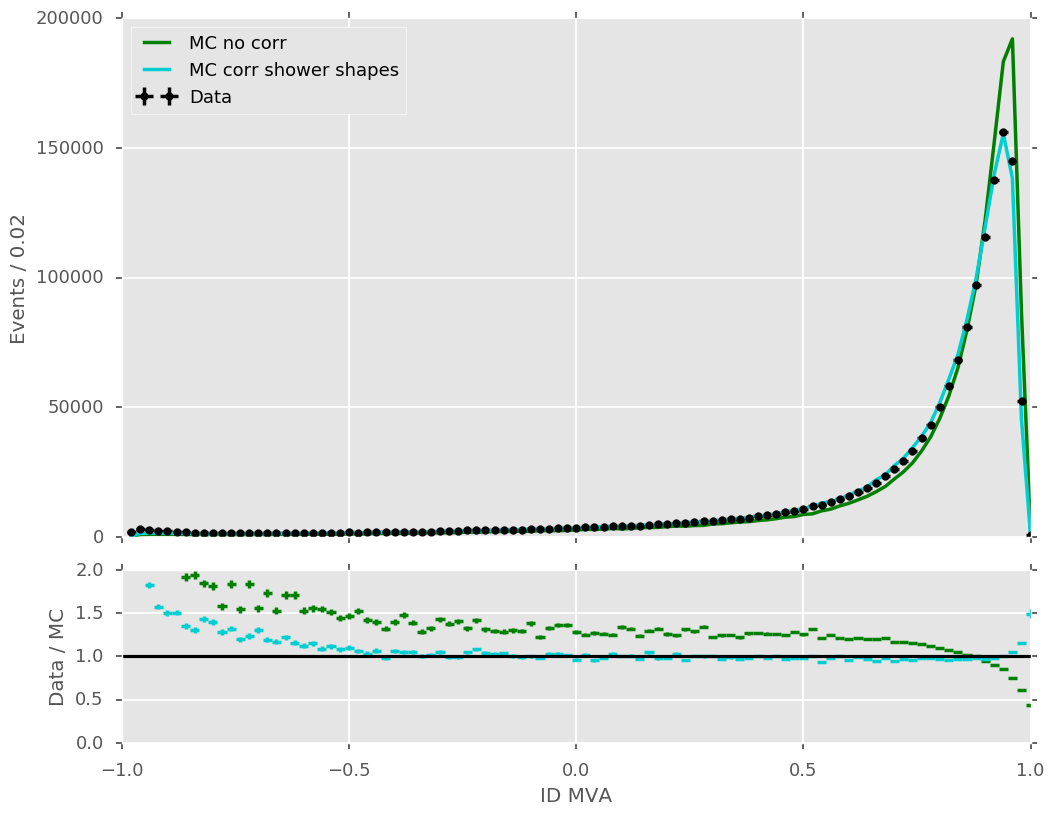

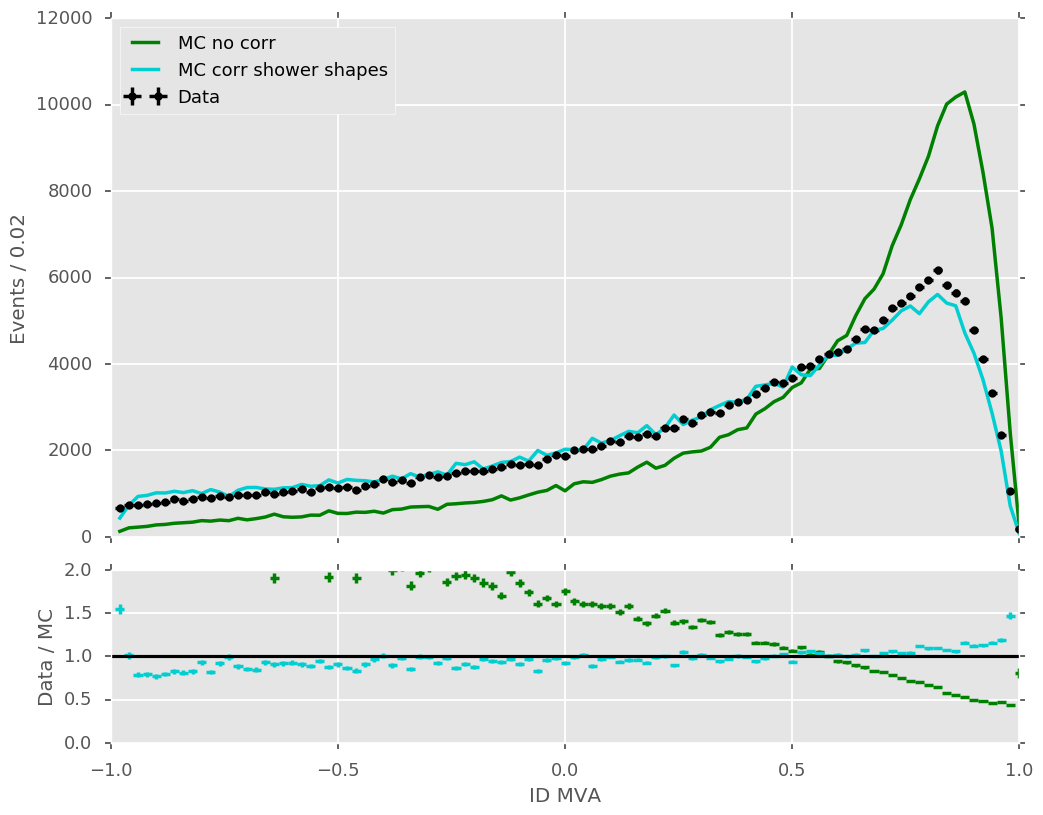

In [13]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes']#, 'corrIso', 'corrAll' ]
mcstyles = [ dict(label='MC no corr',color='green'), 
             dict(label='MC corr shower shapes',color='darkturquoise'), 
             dict(label='MC corr iso',color='orange'),
             dict(label='MC corr all',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))